# IMDB LSTM KAGGLE, 높은성능 실습
-181207
https://www.kaggle.com/nilanml/imdb-review-deep-model-94-89-accuracy

IMDB Review - Deep Model ~ 99.97% Accuracy

In [1]:
from importlib import reload
import sys
from imp import reload
import warnings
warnings.filterwarnings('ignore')
if sys.version[0] == '2':
    reload(sys)
    sys.setdefaultencoding("utf-8")

In [2]:
import pandas as pd
import numpy as np
df1 = pd.read_csv('data/labeledTrainData.tsv', delimiter="\t")
df1 = df1.drop(['id'], axis=1)
df1.head()

,sentiment,review
0,1,With all this stuff going down at the moment w...
1,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,0,The film starts with a manager (Nicholas Bell)...
3,0,It must be assumed that those who praised this...
4,1,Superbly trashy and wondrously unpretentious 8...


In [3]:
df2 = pd.read_csv('data/imdb_master.csv',encoding="latin-1")
df2 = df2.drop(['Unnamed: 0','type','file'],axis=1)
df2.columns = ["review","sentiment"]
df2 = df2[df2.sentiment != 'unsup']
df2['sentiment'] = df2['sentiment'].map({'pos': 1, 'neg': 0})
df2.head()

,review,sentiment
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0


In [4]:
df = pd.concat([df1, df2]).reset_index(drop=True)
df.head()

,review,sentiment
0,With all this stuff going down at the moment w...,1
1,"\The Classic War of the Worlds\"" by Timothy Hi...",1
2,The film starts with a manager (Nicholas Bell)...,0
3,It must be assumed that those who praised this...,0
4,Superbly trashy and wondrously unpretentious 8...,1


In [5]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english")) 
lemmatizer = WordNetLemmatizer()


def clean_text(text):
    text = re.sub(r'[^\w\s]','',text, re.UNICODE)
    text = text.lower()
    text = [lemmatizer.lemmatize(token) for token in text.split(" ")]
    text = [lemmatizer.lemmatize(token, "v") for token in text]
    text = [word for word in text if not word in stop_words]
    text = " ".join(text)
    return text

df['Processed_Reviews'] = df.review.apply(lambda x: clean_text(x))

df.head()

,review,sentiment,Processed_Reviews
0,With all this stuff going down at the moment w...,1,stuff go moment mj ive start listen music watc...
1,"\The Classic War of the Worlds\"" by Timothy Hi...",1,classic war world timothy hines entertain film...
2,The film starts with a manager (Nicholas Bell)...,0,film start manager nicholas bell give welcome ...
3,It must be assumed that those who praised this...,0,must assume praise film greatest film opera ev...
4,Superbly trashy and wondrously unpretentious 8...,1,superbly trashy wondrously unpretentious 80 ex...


In [6]:
df.Processed_Reviews.apply(lambda x: len(x.split(" "))).mean()

128.51009333333334

In [7]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras.layers import Convolution1D
from keras import initializers, regularizers, constraints, optimizers, layers

max_features = 6000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(df['Processed_Reviews'])
list_tokenized_train = tokenizer.texts_to_sequences(df['Processed_Reviews'])

maxlen = 130
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
y = df['sentiment']

embed_size = 128
model = Sequential()
model.add(Embedding(max_features, embed_size))
model.add(Bidirectional(LSTM(32, return_sequences = True)))
model.add(GlobalMaxPool1D())
model.add(Dense(20, activation="relu"))
model.add(Dropout(0.05))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

batch_size = 64
epochs = 100
hist = model.fit(X_t,y, batch_size=batch_size, 
                 epochs=epochs, validation_split=0.2
                )

Using TensorFlow backend.


Train on 60000 samples, validate on 15000 samples
Epoch 1/100
60000/60000 [==============================] - 375s 6ms/step - loss: 0.3235 - acc: 0.8555 - val_loss: 0.2602 - val_acc: 0.9018
Epoch 2/100
60000/60000 [==============================] - 381s 6ms/step - loss: 0.2062 - acc: 0.9198 - val_loss: 0.1955 - val_acc: 0.9307
Epoch 3/100
60000/60000 [==============================] - 376s 6ms/step - loss: 0.1524 - acc: 0.9434 - val_loss: 0.1013 - val_acc: 0.9699
Epoch 4/100
60000/60000 [==============================] - 370s 6ms/step - loss: 0.1057 - acc: 0.9646 - val_loss: 0.0751 - val_acc: 0.9787
Epoch 5/100
60000/60000 [==============================] - 368s 6ms/step - loss: 0.0708 - acc: 0.9785 - val_loss: 0.0489 - val_acc: 0.9861
Epoch 6/100
60000/60000 [==============================] - 362s 6ms/step - loss: 0.0498 - acc: 0.9849 - val_loss: 0.0587 - val_acc: 0.9821
Epoch 7/100
60000/60000 [==============================] - 358s 6ms/step - loss: 0.0335 - acc: 0.9905 - val_loss: 0.

60000/60000 [==============================] - 356s 6ms/step - loss: 0.0018 - acc: 0.9994 - val_loss: 0.0048 - val_acc: 0.9992
Epoch 60/100
60000/60000 [==============================] - 359s 6ms/step - loss: 0.0022 - acc: 0.9993 - val_loss: 0.0042 - val_acc: 0.9992
Epoch 61/100
60000/60000 [==============================] - 357s 6ms/step - loss: 0.0021 - acc: 0.9993 - val_loss: 0.0053 - val_acc: 0.9987
Epoch 62/100
60000/60000 [==============================] - 358s 6ms/step - loss: 4.1541e-04 - acc: 0.9999 - val_loss: 0.0038 - val_acc: 0.9993
Epoch 63/100
60000/60000 [==============================] - 357s 6ms/step - loss: 1.7494e-05 - acc: 1.0000 - val_loss: 0.0033 - val_acc: 0.9995
Epoch 64/100
60000/60000 [==============================] - 365s 6ms/step - loss: 5.3514e-06 - acc: 1.0000 - val_loss: 0.0034 - val_acc: 0.9995
Epoch 65/100
60000/60000 [==============================] - 361s 6ms/step - loss: 3.7663e-06 - acc: 1.0000 - val_loss: 0.0033 - val_acc: 0.9995
Epoch 66/100
6000

Best validation accuracy :  99.97 %


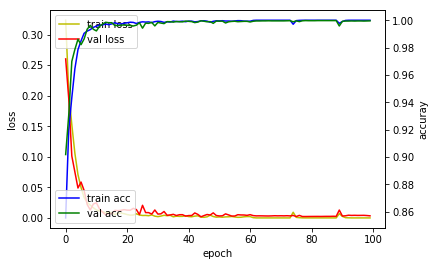

In [12]:
# 5. 모델 학습 과정 표시하기
print('Best validation accuracy : ', round(np.max(hist.history['val_acc'])*100,2), '%')
# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         768000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 64)          41216     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1300      
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 810,537
Trainable params: 810,537
Non-trainable params: 0
_________________________________________________________________
